# 🔍 ANÁLISE EXPLORATÓRIA DE DADOS (EDA)

**Objetivo:** Entender os dados e identificar padrões que influenciam a **inadimplência** de clientes.

## 📌 O que vamos descobrir:
- Qualidade dos dados (missing, duplicatas)
- Quem são os inadimplentes?
- Quais variáveis mais impactam o risco de crédito?
- Dados estão prontos para Machine Learning?

In [ ]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as stats
import warnings
warnings.filterwarnings('ignore')

# Configs de visualização
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("Set2")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10
%matplotlib inline

pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

print("✅ Bibliotecas carregadas!")

In [ ]:
# Carregando dados do SQLite
DB_PATH = 'data/database.db'

conn = sqlite3.connect(DB_PATH)
df = pd.read_sql("SELECT * FROM clientes", conn)
conn.close()

print(f"📊 Dados carregados: {df.shape[0]:,} clientes × {df.shape[1]} variáveis")
print(f"🎯 Target: inadimplente (0=Adimplente, 1=Inadimplente)")

---
# 1️⃣ VISÃO GERAL DOS DADOS
---

In [ ]:
print("📋 Amostra dos dados:\n")
display(df.head())

print("📊 Estrutura do dataset:\n")
df.info()

print("🔍 VERIFICAÇÃO DE QUALIDADE")
print("=" * 60)

# Valores nulos
print(f"\n❓ Valores nulos: {df.isnull().sum().sum()}")

# Duplicatas
duplicatas = df.duplicated().sum()
print(f"🔄 Duplicatas: {duplicatas}")

### ✋ OBSERVAÇÃO
**100.000 clientes** no Dataset, zero valores nulos e zero duplicatas. Dados prontos para modelagem sem necessidade de limpeza inicial.


---
# 2️⃣ ANÁLISE DO TARGET (INADIMPLÊNCIA)
---

In [ ]:
# Distribuição da Inadimplência
inadimplencia = df['inadimplente'].value_counts()
percentuais = df['inadimplente'].value_counts(normalize=True) * 100

print("🎯 DISTRIBUIÇÃO DO TARGET")
print("=" * 60)
print(f"\n✅ Adimplentes (0): {inadimplencia[0]:,} ({percentuais[0]:.1f}%)")
print(f"❌ Inadimplentes (1): {inadimplencia[1]:,} ({percentuais[1]:.1f}%)")

# Gráficos
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

# Barras
colors = ['#2ecc71', '#e74c3c']
inadimplencia.plot(kind='bar', ax=ax[0], color=colors, edgecolor='black')
ax[0].set_title('Distribuição de Inadimplentes', fontsize=14, fontweight='bold')
ax[0].set_xlabel('Status', fontsize=12)
ax[0].set_ylabel('Quantidade', fontsize=12)
ax[0].set_xticklabels(['Adimplente', 'Inadimplente'], rotation=0)
ax[0].grid(axis='y', alpha=0.3)

# Pizza
ax[1].pie(inadimplencia, labels=['Adimplente', 'Inadimplente'], autopct='%1.1f%%',
          colors=colors, startangle=90, textprops={'fontsize': 12})
ax[1].set_title('Proporção de Inadimplência', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

---

### 💡 INSIGHT

**Dados desbalanceados:** 80.8% adimplentes vs 19.2% inadimplentes (proporção 4:1). Precisaremos usar **SMOTE ou ajuste de pesos** no modelo para evitar viés preditivo.

---
# 3️⃣ VARIÁVEIS NUMÉRICAS vs INADIMPLÊNCIA
---

In [ ]:
# Idade vs Inadimplência
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

# Histograma
df[df['inadimplente'] == 0]['idade'].hist(bins=20, alpha=0.6, label='Adimplente', 
                                            color='#2ecc71', ax=ax[0], edgecolor='black')
df[df['inadimplente'] == 1]['idade'].hist(bins=20, alpha=0.6, label='Inadimplente', 
                                            color='#e74c3c', ax=ax[0], edgecolor='black')
ax[0].set_title('Distribuição de Idade por Status', fontsize=14, fontweight='bold')
ax[0].set_xlabel('Idade (anos)', fontsize=12)
ax[0].set_ylabel('Frequência', fontsize=12)
ax[0].legend()
ax[0].grid(axis='y', alpha=0.3)

# Boxplot
df.boxplot(column='idade', by='inadimplente', ax=ax[1], patch_artist=True,
           boxprops=dict(facecolor='lightblue', color='black'),
           medianprops=dict(color='red', linewidth=2))
ax[1].set_title('Idade: Adimplentes vs Inadimplentes', fontsize=14, fontweight='bold')
ax[1].set_xlabel('Inadimplente (0=Não, 1=Sim)', fontsize=12)
ax[1].set_ylabel('Idade (anos)', fontsize=12)
plt.suptitle('')

plt.tight_layout()
plt.show()

---

### 💡 INSIGHT

**Idade NÃO é um fator decisivo:** ambos os grupos têm média de ~40 anos. A inadimplência está mais ligada a fatores financeiros do que demográficos.

---

In [ ]:
# Renda Anual vs Inadimplência
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

# Histograma
df[df['inadimplente'] == 0]['renda_anual'].hist(bins=30, alpha=0.6, label='Adimplente', 
                                                  color='#2ecc71', ax=ax[0], edgecolor='black')
df[df['inadimplente'] == 1]['renda_anual'].hist(bins=30, alpha=0.6, label='Inadimplente', 
                                                  color='#e74c3c', ax=ax[0], edgecolor='black')
ax[0].set_title('Distribuição de Renda Anual', fontsize=14, fontweight='bold')
ax[0].set_xlabel('Renda Anual (R$)', fontsize=12)
ax[0].set_ylabel('Frequência', fontsize=12)
ax[0].legend()
ax[0].grid(axis='y', alpha=0.3)

# Boxplot
df.boxplot(column='renda_anual', by='inadimplente', ax=ax[1], patch_artist=True,
           boxprops=dict(facecolor='lightgreen', color='black'),
           medianprops=dict(color='red', linewidth=2))
ax[1].set_title('Renda: Adimplentes vs Inadimplentes', fontsize=14, fontweight='bold')
ax[1].set_xlabel('Inadimplente (0=Não, 1=Sim)', fontsize=12)
ax[1].set_ylabel('Renda Anual (R$)', fontsize=12)
plt.suptitle('')

plt.tight_layout()
plt.show()

---

### 💡 INSIGHT

**Diferença brutal na renda:** inadimplentes ganham **56.7% a menos** (R$ 31k vs R$ 48.5k). Renda baixa é um forte indicador de risco de crédito. Mediana de R$ 23k pode ser um threshold crítico.

---

In [ ]:
# Score Serasa vs Inadimplência
fix, ax = plt.subplots(1, 2, figsize=(14, 5))

# Histograma
df[df['inadimplente'] == 0]['score_serasa_externo'].hist(bins=30, alpha=0.6, label='Adimplente', 
                                                           color='#2ecc71', ax=ax[0], edgecolor='black')
df[df['inadimplente'] == 1]['score_serasa_externo'].hist(bins=30, alpha=0.6, label='Inadimplente', 
                                                           color='#e74c3c', ax=ax[0], edgecolor='black')
ax[0].set_title('Distribuição de Score Serasa', fontsize=14, fontweight='bold')
ax[0].set_xlabel('Score Serasa', fontsize=12)
ax[0].set_ylabel('Frequência', fontsize=12)
ax[0].legend()
ax[0].grid(axis='y', alpha=0.3)

# Boxplot
df.boxplot(column='score_serasa_externo', by='inadimplente', ax=ax[1], patch_artist=True,
           boxprops=dict(facecolor='lightyellow', color='black'),
           medianprops=dict(color='red', linewidth=2))
ax[1].set_title('Score Serasa: Adimplentes vs Inadimplentes', fontsize=14, fontweight='bold')
ax[1].set_xlabel('Inadimplente (0=Não, 1=Sim)', fontsize=12)
ax[1].set_ylabel('Score Serasa', fontsize=12)
plt.suptitle('')

plt.tight_layout()
plt.show()

---

### 💡 INSIGHT

**Score Serasa é altamente preditivo:** inadimplentes têm score **72 pontos menor** (541 vs 613). **75% dos inadimplentes têm score < 650** — este pode ser um excelente ponto de corte para classificação de risco.

---

In [ ]:
# Utilização de Cartão vs Inadimplência
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

# Histograma
df[df['inadimplente'] == 0]['utilizacao_limite_cartao'].hist(bins=30, alpha=0.6, label='Adimplente', 
                                                               color='#2ecc71', ax=ax[0], edgecolor='black')
df[df['inadimplente'] == 1]['utilizacao_limite_cartao'].hist(bins=30, alpha=0.6, label='Inadimplente', 
                                                               color='#e74c3c', ax=ax[0], edgecolor='black')
ax[0].set_title('Distribuição de Utilização do Cartão', fontsize=14, fontweight='bold')
ax[0].set_xlabel('Utilização do Limite (%)', fontsize=12)
ax[0].set_ylabel('Frequência', fontsize=12)
ax[0].legend()
ax[0].grid(axis='y', alpha=0.3)

# Boxplot
df.boxplot(column='utilizacao_limite_cartao', by='inadimplente', ax=ax[1], patch_artist=True,
           boxprops=dict(facecolor='lightcoral', color='black'),
           medianprops=dict(color='darkred', linewidth=2))
ax[1].set_title('Utilização do Cartão: Adimplentes vs Inadimplentes', fontsize=14, fontweight='bold')
ax[1].set_xlabel('Inadimplente (0=Não, 1=Sim)', fontsize=12)
ax[1].set_ylabel('Utilização do Limite (%)', fontsize=12)
plt.suptitle('')

plt.tight_layout()
plt.show()

---

### 💡 INSIGHT

**Sinal de alerta acima de 80%:** clientes com utilização >80% do limite têm **34.1% de chance de inadimplir** (quase o dobro da média). Inadimplentes usam 7.1% a mais do limite disponível.


---
# 4️⃣ VARIÁVEIS CATEGÓRICAS vs INADIMPLÊNCIA
---

In [ ]:
# Escolaridade vs Inadimplência
tabela = pd.crosstab(df['escolaridade'], df['inadimplente'], normalize='index') * 100

print("🎓 ESCOLARIDADE vs INADIMPLÊNCIA")
print("=" * 60)
print("\n% de Inadimplentes por Escolaridade:")
print(tabela[1].sort_values(ascending=False).round(1))

# Barras
tabela_count = pd.crosstab(df['escolaridade'], df['inadimplente'])
tabela_count.plot(kind='bar', stacked=True, figsize=(10, 6), 
                   color=['#2ecc71', '#e74c3c'], edgecolor='black')
plt.title('Inadimplência por Escolaridade', fontsize=14, fontweight='bold')
plt.xlabel('Escolaridade', fontsize=12)
plt.ylabel('Quantidade de Clientes', fontsize=12)
plt.legend(['Adimplente', 'Inadimplente'], loc='upper left')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

---

### 💡 INSIGHT

**Educação protege levemente:** Pós-graduação tem menor inadimplência (13.3%) vs Fundamental (20.1%). Porém, a diferença não é enorme.

---

In [ ]:
# Ocupação vs Inadimplência
tabela = pd.crosstab(df['ocupacao'], df['inadimplente'], normalize='index') * 100

print("💼 OCUPAÇÃO vs INADIMPLÊNCIA")
print("=" * 60)
print("\n% de Inadimplentes por Ocupação:")
print(tabela[1].sort_values(ascending=False).round(1))

# Barras
tabela_count = pd.crosstab(df['ocupacao'], df['inadimplente'])
tabela_count.plot(kind='bar', stacked=True, figsize=(10, 6), 
                   color=['#2ecc71', '#e74c3c'], edgecolor='black')
plt.title('Inadimplência por Ocupação', fontsize=14, fontweight='bold')
plt.xlabel('Ocupação', fontsize=12)
plt.ylabel('Quantidade de Clientes', fontsize=12)
plt.legend(['Adimplente', 'Inadimplente'], loc='upper left')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

💍 ESTADO CIVIL vs INADIMPLÊNCIA

% de Inadimplentes por Estado Civil:
estado_civil
Casado        19.4
Solteiro      19.1
Viúvo         19.0
Divorciado    19.0
Name: 1, dtype: float64


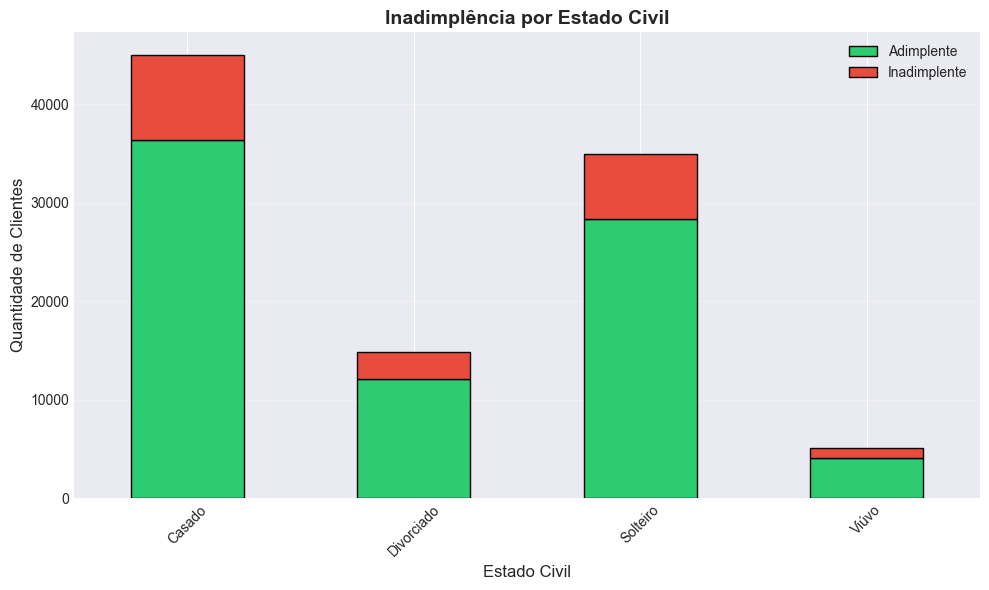

In [68]:
# Estado Civil vs Inadimplência
tabela = pd.crosstab(df['estado_civil'], df['inadimplente'], normalize='index') * 100

print("💍 ESTADO CIVIL vs INADIMPLÊNCIA")
print("=" * 60)
print("\n% de Inadimplentes por Estado Civil:")
print(tabela[1].sort_values(ascending=False).round(1))

# Barras
tabela_count = pd.crosstab(df['estado_civil'], df['inadimplente'])
tabela_count.plot(kind='bar', stacked=True, figsize=(10, 6), 
                   color=['#2ecc71', '#e74c3c'], edgecolor='black')
plt.title('Inadimplência por Estado Civil', fontsize=14, fontweight='bold')
plt.xlabel('Estado Civil', fontsize=12)
plt.ylabel('Quantidade de Clientes', fontsize=12)
plt.legend(['Adimplente', 'Inadimplente'], loc='upper right')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

---

### 💡 INSIGHT

**Desemprego é o maior risco:** 64% dos desempregados são inadimplentes — **mais de 3x a taxa geral**. CLT, Autônomos e Empresários têm taxas similares (~17%), indicando que estabilidade de emprego é crítica.

---

In [ ]:
# Correlação com o Target
df_numeric = df.select_dtypes(include=[np.number])
correlacao = df_numeric.corr()

print("🎯 TOP 8 CORRELAÇÕES COM INADIMPLÊNCIA")
print("=" * 60)

corr_target = correlacao['inadimplente'].drop('inadimplente').abs().sort_values(ascending=False)

for i, (var, valor) in enumerate(corr_target.head(8).items(), 1):
    direcao = "⬆️ POSITIVA" if correlacao.loc[var, 'inadimplente'] > 0 else "⬇️ NEGATIVA"
    forca = "🔴 FORTE" if valor > 0.5 else "🟡 MODERADA" if valor > 0.3 else "🟢 FRACA"
    print(f"{i:2}. {var:<30} {direcao:12} | {correlacao.loc[var, 'inadimplente']:>6.3f} {forca}")

# Heatmap das variáveis mais importantes
top_vars = corr_target.head(8).index.tolist() + ['inadimplente']
corr_top = df_numeric[top_vars].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_top, annot=True, fmt='.2f', cmap='coolwarm', center=0, 
            square=True, linewidths=1, cbar_kws={"shrink": 0.8}, vmin=-1, vmax=1)
plt.title('Matriz de Correlação - Variáveis mais importantes', fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

---

### 💡 INSIGHT

**Top 3 variáveis preditivas:**

1. **Score Serasa** (0.197) — maior correlação
2. **Histórico de Atrasos** (0.174) — comportamento passado prediz futuro
3. **Posse de Imóvel** (0.164) — patrimônio reduz risco

Juntas, essas variáveis devem ser priorizadas no modelo de ML.

---